**Assignment 1 - ML Data Cleaning & Feature Selection**

**About Dataset**

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

**Dataset Link:** https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

**Data Dictionary:**

Booking_ID: unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.

In [41]:
#installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
# Importing the libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

In [43]:
from google.colab import files
files = files.upload()

Saving Hotel Reservations.csv to Hotel Reservations (7).csv


In [44]:
df = pd.read_csv("Hotel Reservations.csv")

**1. What are the data types? (Only numeric and categorical)**

In [45]:
#Getting the list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

#Getting the list of numerical columns
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()

#Printing the list of categorical and numerical columns
print("--------------------------------------------------------")
print("                 Categorical Variables                  ")
print("--------------------------------------------------------")
print(f'Total number of categorical variables in our dataset: {len(categorical_cols)}')
for row,col in enumerate(categorical_cols):
    print(f'{row+1}. {col}')
print("\n")
print("--------------------------------------------------------")
print("                 Numerical Variables                  ")
print("--------------------------------------------------------")
print(f'Total number of numerical variables in our dataset: {len(numerical_cols)}')
for row,col in enumerate(numerical_cols):
    print(f'{row+1}. {col}')

--------------------------------------------------------
                 Categorical Variables                  
--------------------------------------------------------
Total number of categorical variables in our dataset: 5
1. Booking_ID
2. type_of_meal_plan
3. room_type_reserved
4. market_segment_type
5. booking_status


--------------------------------------------------------
                 Numerical Variables                  
--------------------------------------------------------
Total number of numerical variables in our dataset: 14
1. no_of_adults
2. no_of_children
3. no_of_weekend_nights
4. no_of_week_nights
5. required_car_parking_space
6. lead_time
7. arrival_year
8. arrival_month
9. arrival_date
10. repeated_guest
11. no_of_previous_cancellations
12. no_of_previous_bookings_not_canceled
13. avg_price_per_room
14. no_of_special_requests


**Numerical/Quantitative DataTypes:**
Numerical data refers to the data that is in the form of numbers, and not in any language or descriptive form. ex: no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests

**Categorical/Qualitative DataTypes:**
Categorical data refers to a data type that can be stored and identified based on the names or labels given to them. ex: Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, booking_status

**2. Are there missing values?**

In [46]:
#Checking missing values in our data
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [47]:
# We need to check NaN values in dataset
df.isna().sum()
     

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

We have 0% missing values both in our independent variables as well as dependent variable

**3. What are the likely distributions of the numeric variables?**



<Figure size 576x360 with 0 Axes>

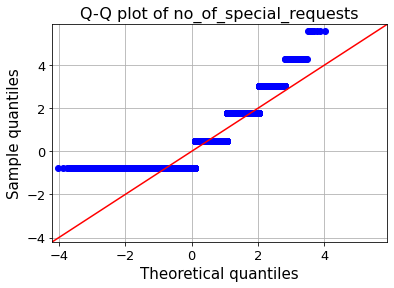

<Figure size 576x360 with 0 Axes>

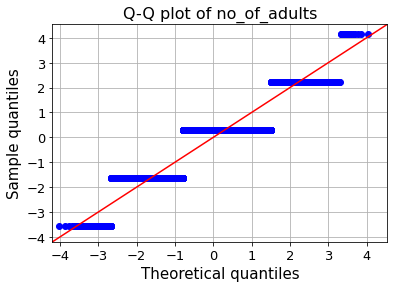

<Figure size 576x360 with 0 Axes>

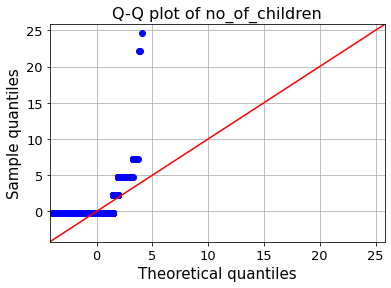

<Figure size 576x360 with 0 Axes>

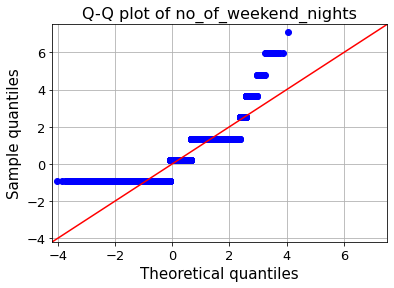

<Figure size 576x360 with 0 Axes>

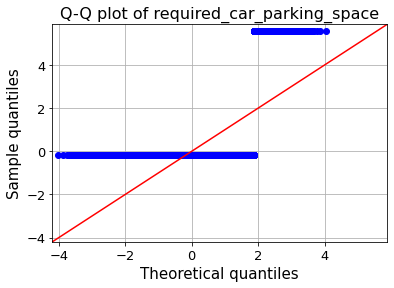

<Figure size 576x360 with 0 Axes>

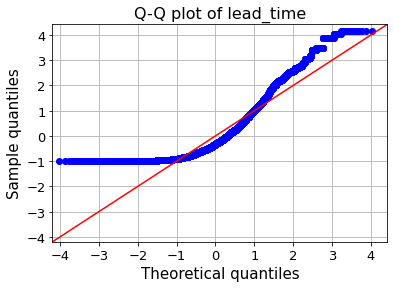

<Figure size 576x360 with 0 Axes>

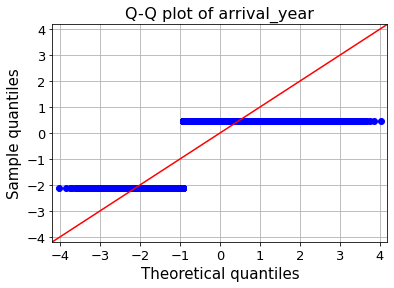

<Figure size 576x360 with 0 Axes>

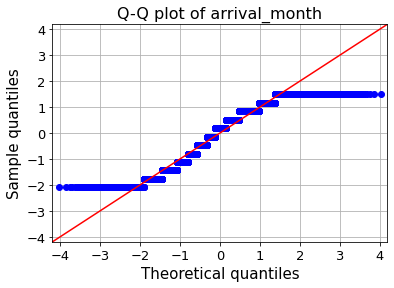

<Figure size 576x360 with 0 Axes>

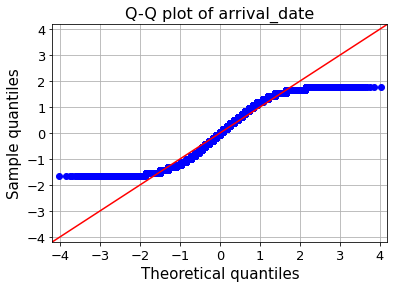

<Figure size 576x360 with 0 Axes>

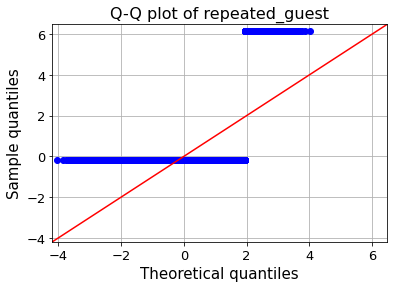

<Figure size 576x360 with 0 Axes>

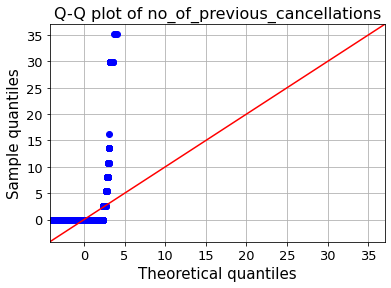

<Figure size 576x360 with 0 Axes>

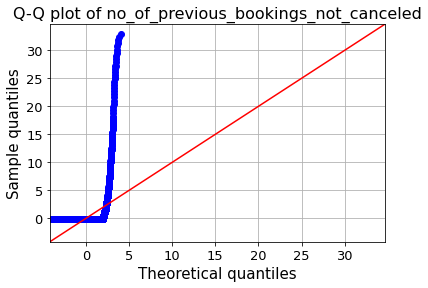

<Figure size 576x360 with 0 Axes>

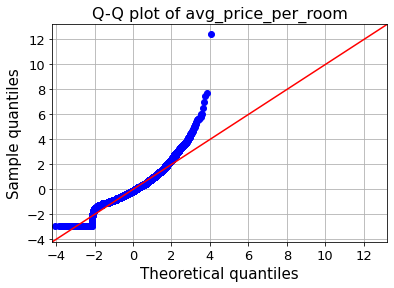

In [48]:
from statsmodels.graphics.gofplots import qqplot
df_norm=df[['no_of_special_requests','no_of_adults','no_of_children','no_of_weekend_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']]

for c in df_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(df_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

1. Looking at the Q-Q plot above, it appears that all independent variables are roughly following normal distribution.

2. There are few outliers in few of the predictor variables.

**4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**


**Method 1:** SelectKBest 

In [49]:
#Normalizing the data and creating the Dummies
data = pd.get_dummies(df)

#Normalizing the data in the columns beacuse some values are too high when compared to other independent variable

from sklearn import preprocessing

#Create x to store scaled values as floats. (between 0-1)
#Here we are not normalizing the categorical variables since there values are 0 or 1 already.

x = df[['no_of_special_requests','no_of_adults','no_of_children','no_of_weekend_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['no_of_special_requests','no_of_adults','no_of_children','no_of_weekend_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']] = pd.DataFrame(x_scaled)

In [50]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,0.50,0.0,0.142857,2,0.0,0.505643,0.0,0.818182,0.033333,0.0,...,0,0,0,0,0,0,1,0,0,1
1,0.50,0.0,0.285714,3,0.0,0.011287,1.0,0.909091,0.166667,0.0,...,0,0,0,0,0,0,0,1,0,1
2,0.25,0.0,0.285714,1,0.0,0.002257,1.0,0.090909,0.900000,0.0,...,0,0,0,0,0,0,0,1,1,0
3,0.50,0.0,0.000000,2,0.0,0.476298,1.0,0.363636,0.633333,0.0,...,0,0,0,0,0,0,0,1,1,0
4,0.50,0.0,0.142857,1,0.0,0.108352,1.0,0.272727,0.333333,0.0,...,0,0,0,0,0,0,0,1,1,0


In [51]:
np.any(np.isnan(data))

np.all(np.isfinite(data))

True

In [52]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [53]:
# Create feature and target variable for Classification problem
X_clf=data.iloc[:,0:63] # features
y_clf=data.iloc[:,64] # Target variable

#Since we are getting an error suggesting nans or infs or out of range nums exist.
#since we know no nulls are present we are trying to remove any infs if present.
df.replace([np.inf, -np.inf], np.nan)

df.dropna(inplace=True)

In [54]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
from sklearn.feature_selection import SelectKBest, f_classif
#X_clf_new = SelectKBest(score_func=chi2,k=10).fit_transform(X_clf,y_clf)
# Create and fit selector
selector = SelectKBest(f_classif, k=5)
selector.fit(X_clf, y_clf)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]

In [55]:
features_df_new.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,arrival_month,arrival_date
0,0.50,0.142857,2,0.818182,0.033333
1,0.50,0.285714,3,0.909091,0.166667
2,0.25,0.285714,1,0.090909,0.900000
3,0.50,0.000000,2,0.363636,0.633333
4,0.50,0.142857,1,0.272727,0.333333


By using SelectKbest method we got above variables as predictable variables.

*   pdays

*   emp.var.rate
*   euriborn3m


*   nr.employed


*   poutcome_sucess




**Method 2:** OLS

In [56]:
#Using OLS for p value:
import statsmodels.api as sm

model = sm.OLS(data['booking_status_Canceled'], data[['no_of_special_requests','no_of_adults','no_of_children','no_of_weekend_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     booking_status_Canceled   R-squared (uncentered):                 -50.855
Model:                                 OLS   Adj. R-squared (uncentered):            -50.874
Method:                      Least Squares   F-statistic:                             -2736.
Date:                     Sun, 05 Feb 2023   Prob (F-statistic):                        1.00
Time:                             04:02:37   Log-Likelihood:                         -17753.
No. Observations:                    36275   AIC:                                  3.553e+04
Df Residuals:                        36262   BIC:                                  3.564e+04
Df Model:                               13                                                  
Covariance Type:                 nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_special_requests                  -0.7445      0.014    -53.725      0.000      -0.772      -0.717
no_of_adults                            -0.0178      0.015     -1.158      0.247      -0.048       0.012
no_of_children                           0.2422      0.055      4.370      0.000       0.134       0.351
no_of_weekend_nights                     0.1570      0.017      9.355      0.000       0.124       0.190
required_car_parking_space              -0.1321      0.012    -10.887      0.000      -0.156      -0.108
lead_time                                0.9795      0.011     85.768      0.000       0.957       1.002
arrival_year                             0.0738      0.006     13.284      0.000       0.063       0.085
arrival_month                           -0.0875      0.007    -11.964      0.000      -0.102      -0.073
arrival_date                            -0.0235      0.007     -3.448      0.001      -0.037      -0.010
repeated_guest                          -0.0733      0.016     -4.547      0.000      -0.105      -0.042
no_of_previous_cancellations            -0.0433      0.084     -0.513      0.608      -0.209       0.122
no_of_previous_bookings_not_canceled     0.1979      0.087      2.286      0.022       0.028       0.368
avg_price_per_room                       1.2099      0.036     33.668      0.000       1.139       1.280
==============================================================================
Omnibus:                     2960.696   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2107.337
Skew:                           0.485   Prob(JB):                         0.00
Kurtosis:                       2.328   Cond. No.                         61.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The no_of_special_requests has the p-value 0, which is lesser and hence it is a significant feature.
* The avg_price_per_room has the p-value 0, which is lesser and hence it is a significant feature.
* The repeated_guest has the p-value 0, which is lesser and hence it is a significant feature.
* The arrival_month has the p-value 0, which is lesser and hence it is a significant feature.
* The arrival_year has the p-value 0, which is lesser and hence it is a significant feature.
* The lead_time has the p-value 0, which is lesser and hence it is a significant feature.
* The required_car_parking_space has the p-value 0, which is lesser and hence it is a significant feature.
* The no_of_weekend_nights has the p-value 0, which is lesser and hence it is a significant feature.
* The no_of_children has the p-value 0, which is lesser and hence it is a significant feature.
* The no_of_adults has the p-value 0.247, which is greater and hence it is a non significant feature.
* The arrival_date has the p-value 0.001, which is greater and hence it is a non significant feature.
* The no_of_previous_cancellations has the p-value 0.608, which is greater and hence it is a non significant feature.
* The no_of_previous_bookings_not_canceled has the p-value 0.022, which is greater and hence it is a non significant feature.


**Method 3:** Z Score

In [57]:
#Calculating Z Score
import pandas as pd
def calculate_z_scores(df):
    return (df - df.mean()) / df.std()
df = pd.DataFrame(df, columns=['no_of_special_requests','no_of_adults','no_of_children','no_of_weekend_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room'])
df = df.apply(pd.to_numeric)
z_scores = calculate_z_scores(df)
print(z_scores)

       no_of_special_requests  no_of_adults  no_of_children  \
0                   -0.788129      0.298889       -0.261467   
1                    0.483754      0.298889       -0.261467   
2                   -0.788129     -1.628953       -0.261467   
3                   -0.788129      0.298889       -0.261467   
4                   -0.788129      0.298889       -0.261467   
...                       ...           ...             ...   
36270                0.483754      2.226730       -0.261467   
36271                1.755637      0.298889       -0.261467   
36272                1.755637      0.298889       -0.261467   
36273               -0.788129      0.298889       -0.261467   
36274               -0.788129      0.298889       -0.261467   

       no_of_weekend_nights  required_car_parking_space  lead_time  \
0                  0.217398                   -0.178817   1.614874   
1                  1.365974                   -0.178817  -0.933688   
2                  1.365974      

If the z score of a data point is more than 3 or less than -3 then it indicates that the data point is quite different from the other data points. Such a data point can be an outlier. 

**5.  Which independent variables have missing data? How much?**

The values in the dataset are checked multiple times therefore no null or nan values in the dataset. No missing data.

**6. Do the training and test sets have the same data?**

In [58]:
from sklearn.model_selection import  train_test_split

X = data[['no_of_special_requests','no_of_adults','no_of_children','no_of_weekend_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']]

y = data['booking_status_Canceled']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

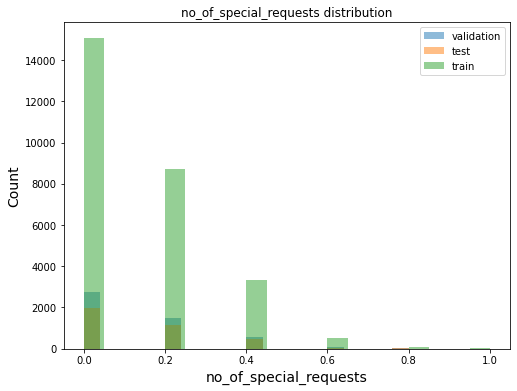

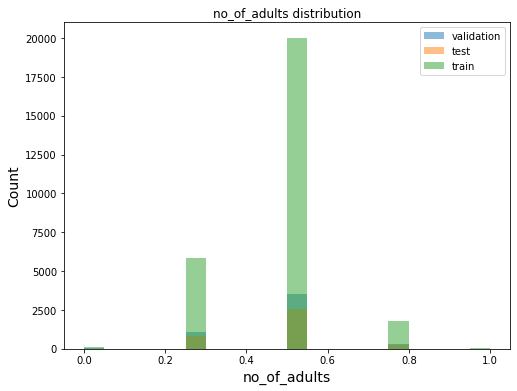

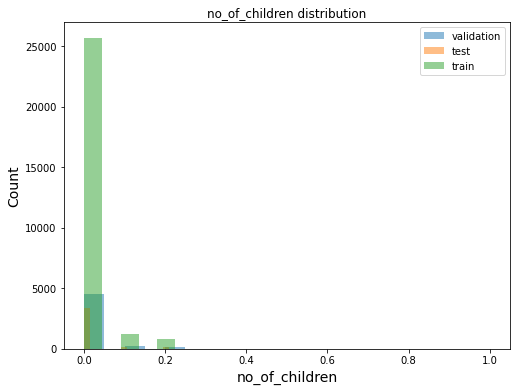

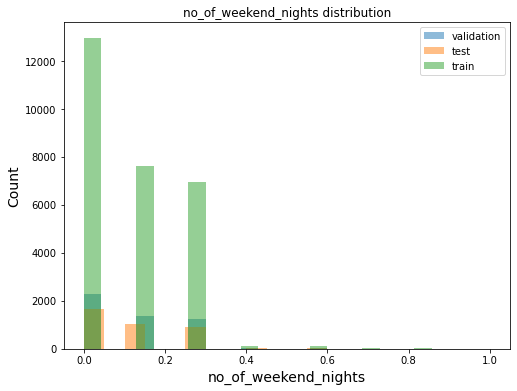

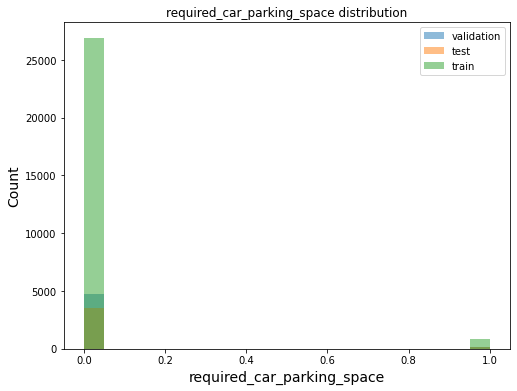

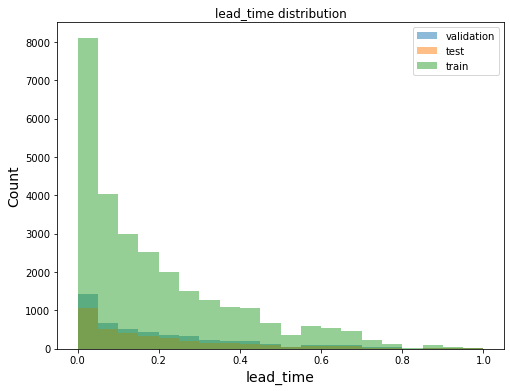

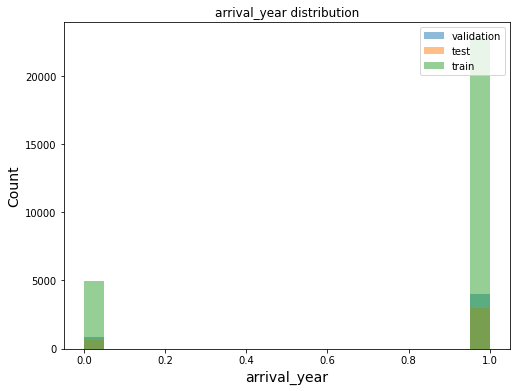

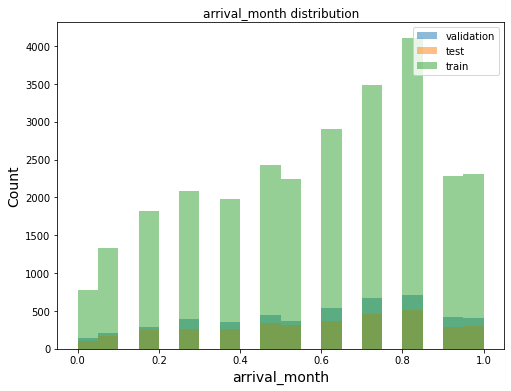

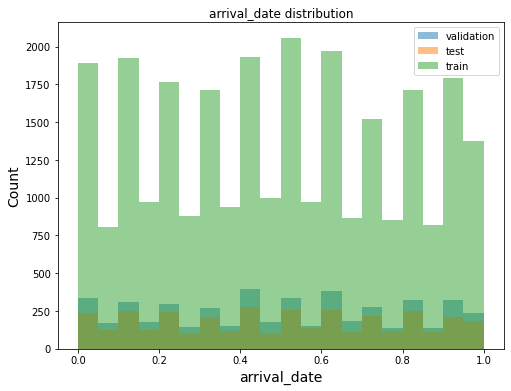

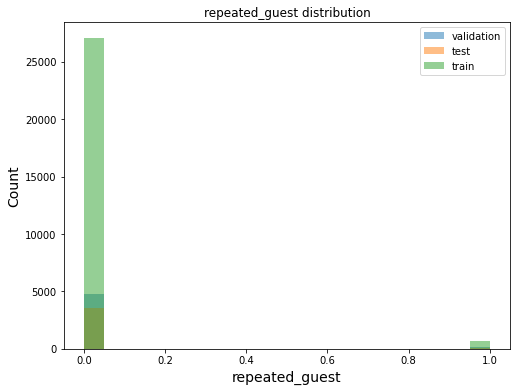

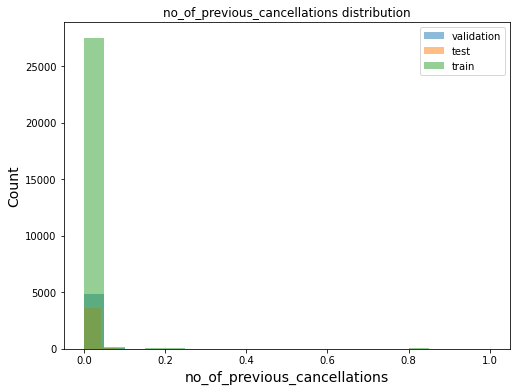

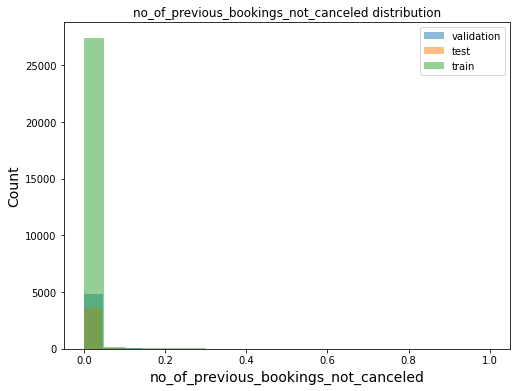

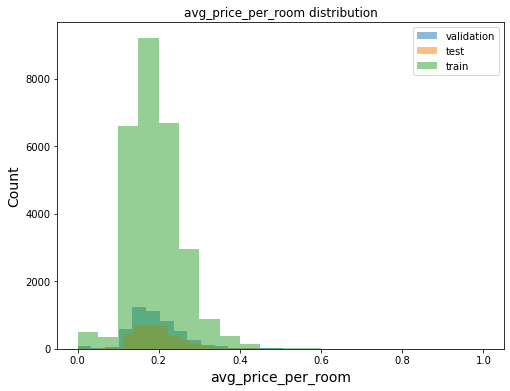

In [59]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['no_of_special_requests','no_of_adults','no_of_children','no_of_weekend_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']]

X_val_plot = X_val[['no_of_special_requests','no_of_adults','no_of_children','no_of_weekend_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']]

X_train_plot = X_train[['no_of_special_requests','no_of_adults','no_of_children','no_of_weekend_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Observation:

The division of dataset in Test, train and validation sets looks fine except few boundary values of 'avg_price_per_room', 'lead_time','no_of_children','no_of_adults' which appears to be missing in test and validation sets.



**7. In the predictor variables independent of all the other predictor variables?**

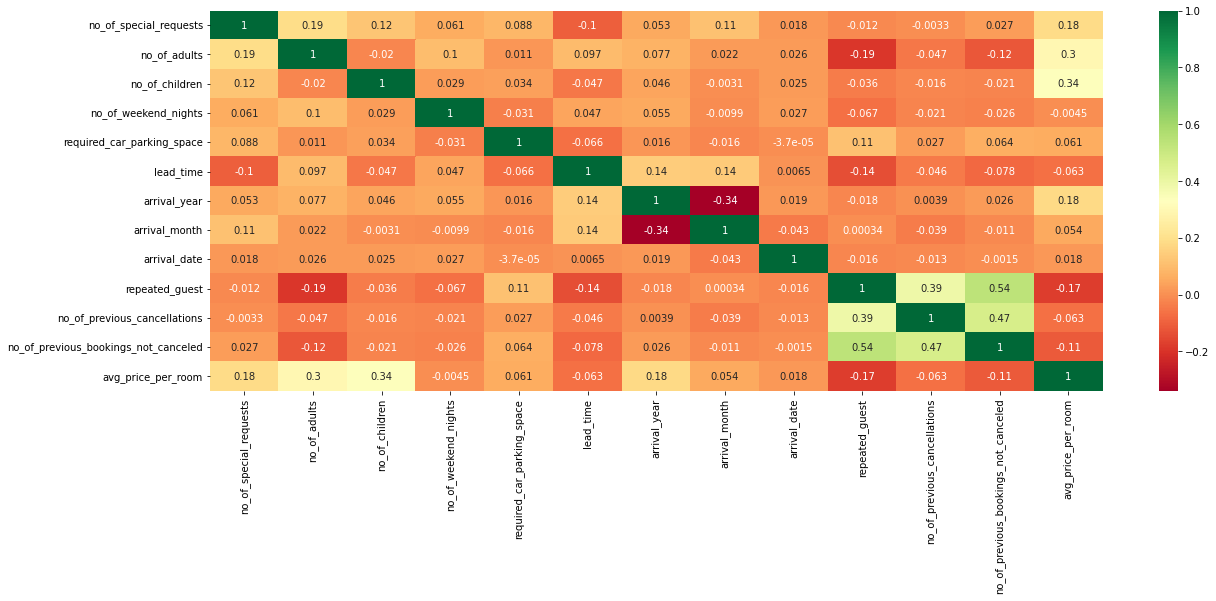

In [60]:
#Heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

Observations:

From the plots, we do not have much high correlation between features. Degree of collinearity is significantly less that is 0.1 for most variables


**8.  Which predictor variables are the most important?**

*From SelecKbest it is observed that emp.var.rate is the most important predictor variable 

*From OLS method euribor3m and poutcome_success should be the most important Predictor variable.

**9. Do the ranges of the predictor variables make sense?**



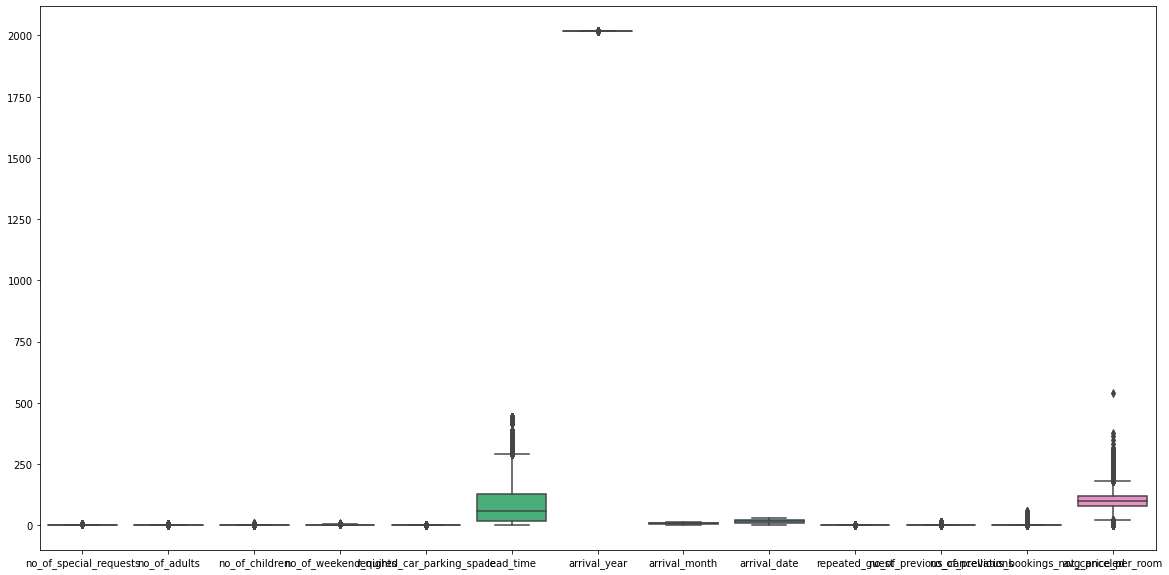

In [61]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

Since we normalized the data, the variable ranges are practically identical. But as we can see from the image above, there are a lot of outliers that we might need to get rid of before moving on so that the data can start to make a lot more sense.



In [62]:
df.describe()

,no_of_special_requests,no_of_adults,no_of_children,no_of_weekend_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,0.619655,1.844962,0.105279,0.810724,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539
std,0.786236,0.518715,0.402648,0.870644,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000
50%,0.000000,2.000000,0.000000,1.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000
75%,1.000000,2.000000,0.000000,2.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000
max,5.000000,4.000000,10.000000,7.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000


**Q10. What are the distributions of the predictor variables?**

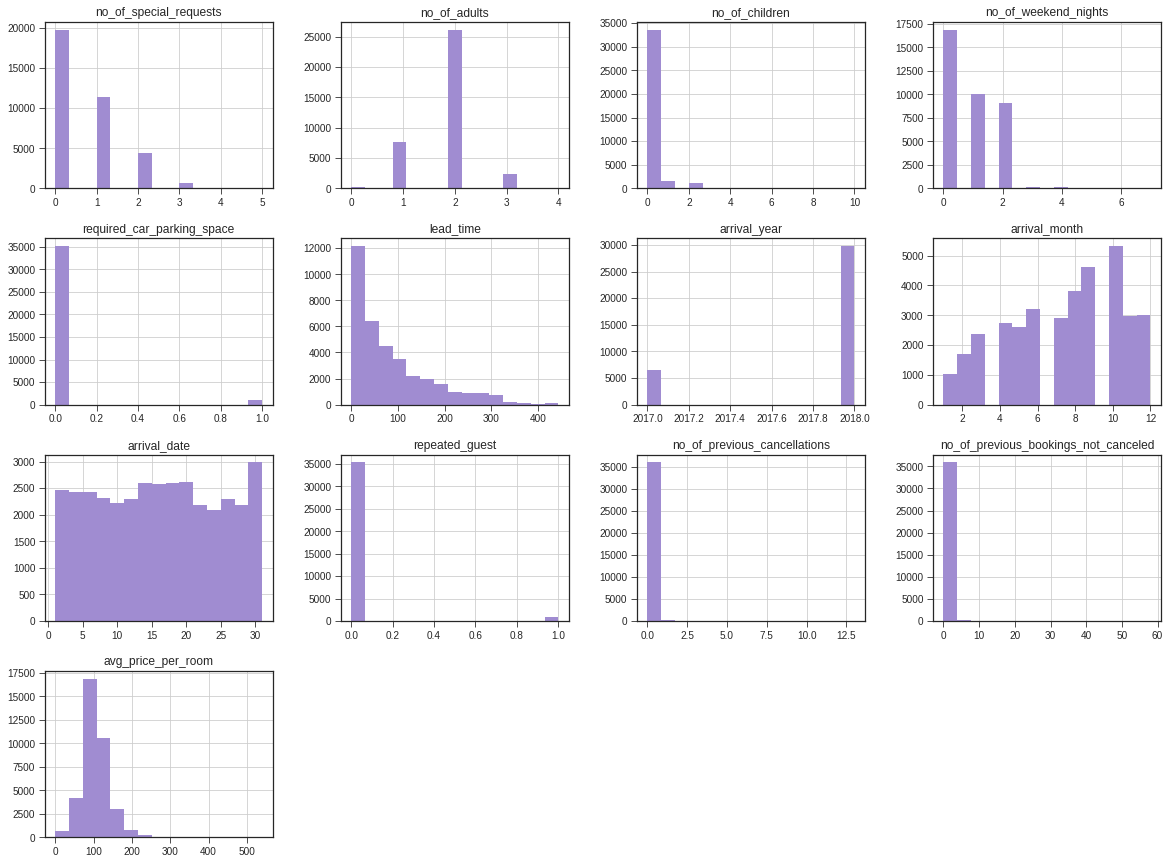

In [63]:
plt.style.use('seaborn-ticks')

df.hist(bins=15, figsize=(20,15), color='#a08cd1')
plt.show();

**11. What are the distributions of the predictor variables?**

In [64]:
#Running the Logistic regression for data before and after removing the outliers
#import the pkgs required
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()


In [65]:
#input variables
X = data[['no_of_special_requests','no_of_adults','no_of_children','no_of_weekend_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']]
#output variable
y = data[['booking_status_Canceled']]
#splitting data in to train and test, 20% of data will be used for testing, stratify for sorting fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logisticRegr.fit(X_train_data, y_train_data)

LogisticRegression()

In [99]:

threshold = 0.5

The output of a Logistic regression model is a probability. We can select a threshold value and if the probability is greater than this threshold value, the event is predicted to happen otherwise it is predicted not to occur.

In [67]:
#setting threshold 0.5 will be the ideal case
logisticRegr.predict(X_test_data)

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [68]:
Z = logisticRegr.predict(X_test_data)

In [69]:
rms = mean_squared_error(y_test_data, Z , squared=False);
rms

0.45937661892521475

In [70]:
logisticRegr.score(X_test_data, y_test_data)

0.788973121984838

In [71]:
#Removing the outliers

Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
final_data = data[~((data < (Q1)) |(data > (Q3))).any(axis=1)]

In [72]:
#import the required packages 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()
#input variables
X1 = data[['no_of_special_requests','no_of_adults','no_of_children','no_of_weekend_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']]
#output variable
y1 = data[['booking_status_Canceled']]
#splitting data in to train and test, 20% of data will be used for testing, stratify for sorting fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same
X1_train_data, X1_test_data, y1_train_data, y1_test_data = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y)
logisticRegr.fit(X1_train_data, y1_train_data)



LogisticRegression()

In [73]:
threshold = 0.5
#setting threshold 0.5 will be the ideal case
logisticRegr.predict(X1_test_data)

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

The output of a Logistic regression model is a probability. We can select a threshold value and if the probability is greater than this threshold value, the event is predicted to happen otherwise it is predicted not to occur.

In [74]:

Z2 = logisticRegr.predict(X1_test_data)

In [75]:
rms = mean_squared_error(y1_test_data, Z2 , squared=False);
rms

0.45937661892521475

In [76]:
logisticRegr.score(X1_test_data, y1_test_data)

0.788973121984838

Therefore, final_data(without outliers) the accuracy is 78.89%


**Q12 Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error. For categorical data, calculate the accuracy and a confusion matrix.**

In [77]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
from sklearn.impute import SimpleImputer
from fancyimpute import KNN

# Remove 1%, 5%, and 10% of the data randomly:
def remove_random_data(df, percentage):
    rows = df.shape[0]
    columns = df.shape[1]
    to_remove = int(rows * percentage)
    indexes = np.random.choice(rows, to_remove, replace=False)
    data_missing = df.copy()
    data_missing.iloc[indexes, :] = np.nan
    return data_missing

In [89]:
# Calculate % error on residuals for numeric data:
def calculate_error(df, data_missing, method):
    data_imputed = method.fit_transform(data_missing)
    error = np.abs(data_imputed - df_norm)
    total_error = error.sum()
    percent_error = (total_error / df.size) * 100
    return percent_error

In [82]:
# Check for bias and variance:
def check_bias_variance(df, data_missing, method):
    data_imputed = method.fit_transform(data_missing)
    bias = np.mean(data_imputed - data)
    variance = np.var(data_imputed - data)
    return bias, variance

In [90]:
# Check for bias and variance:
def check_bias_variance(df, data_missing, method):
    data_imputed = method.fit_transform(data_missing)
    bias = np.mean(data_imputed - df)
    variance = np.var(data_imputed - df)
    return bias, variance

In [92]:
# Remove 1% of data here:
data_missing_1 = remove_random_data(df, 0.01)

# Remove 5% of data here:
data_missing_5 = remove_random_data(df, 0.05)

# Remove 10% of data here:
data_missing_10 = remove_random_data(df, 0.1)

In [95]:

# Impute values using-mean method
mean_imp = SimpleImputer(strategy='mean')
mean_error_1 = calculate_error(df, data_missing_1, mean_imp)
mean_error_5 = calculate_error(df, data_missing_5, mean_imp)
mean_error_10 = calculate_error(df, data_missing_10, mean_imp)
mean_bias_1, mean_variance_1 = check_bias_variance(df, data_missing_1, mean_imp)
mean_bias_5, mean_variance_5 = check_bias_variance(df, data_missing_5, mean_imp)
mean_bias_10, mean_variance_10 = check_bias_variance(df, data_missing_10, mean_imp)


In [96]:
# Impute values using-median method
median_imp = SimpleImputer(strategy='median')
median_error_1 = calculate_error(df, data_missing_1, median_imp)
median_error_5 = calculate_error(df, data_missing_5, median_imp)
median_error_10 = calculate_error(df, data_missing_10, median_imp)
median_bias_1, median_variance_1 = check_bias_variance(df, data_missing_1, median_imp)
median_bias_5, median_variance_5 = check_bias_variance(df, data_missing_5, median_imp)
median_bias_10, median_variance_10 = check_bias_variance(df, data_missing_10, median_imp)

In [97]:
print("Mean Impute Error for 1% Missing Data: ", mean_error_1)
print("Mean Impute Error for 5% Missing Data: ", mean_error_5)
print("Mean Impute Error for 10% Missing Data: ", mean_error_10)
print("Median Impute Error for 1% Missing Data: ", median_error_1)
print("Median Impute Error for 5% Missing Data: ", median_error_5)
print("Median Impute Error for 10% Missing Data: ", median_error_10)

Mean Impute Error for 1% Missing Data:  no_of_special_requests                  0.052706
no_of_adults                            0.026969
no_of_children                          0.014062
no_of_weekend_nights                    0.060260
required_car_parking_space              0.005158
lead_time                               5.285921
arrival_year                            0.021811
arrival_month                           0.204085
arrival_date                            0.589300
repeated_guest                          0.003182
no_of_previous_cancellations            0.005130
no_of_previous_bookings_not_canceled    0.020386
avg_price_per_room                      1.812085
dtype: float64
Mean Impute Error for 5% Missing Data:  no_of_special_requests                   0.258949
no_of_adults                             0.145119
no_of_children                           0.075824
no_of_weekend_nights                     0.292059
required_car_parking_space               0.023431
lead_time         

In [98]:
print("Mean Impute Bias for 1% Missing Data: " , mean_bias_1)
print("Mean Impute Variance for 1% Missing Data: ", mean_variance_1)
print("Median Impute Bias for 1% Missing Data: ", median_bias_1)
print("Median Impute Variance for 1% Missing Data: ", median_variance_1)


Mean Impute Bias for 1% Missing Data:  no_of_special_requests                 -0.000019
no_of_adults                           -0.000003
no_of_children                          0.000142
no_of_weekend_nights                   -0.000237
required_car_parking_space             -0.000077
lead_time                              -0.015699
arrival_year                           -0.000167
arrival_month                           0.003073
arrival_date                            0.008023
repeated_guest                          0.000091
no_of_previous_cancellations           -0.000210
no_of_previous_bookings_not_canceled    0.000377
avg_price_per_room                     -0.005700
dtype: float64
Mean Impute Variance for 1% Missing Data:  no_of_special_requests                   0.006427
no_of_adults                             0.002408
no_of_children                           0.001380
no_of_weekend_nights                     0.007891
required_car_parking_space               0.000372
lead_time       

**Confusion Matrix:**

A confusion matrix is a technique for summarizing the performance of a classification algorithm.

In [87]:
#Confusion matric for data (without outliers)
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import classification_report #Classification_report
print(classification_report(y1_test_data,Z2))
print(confusion_matrix(y1_test_data,Z2))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      4878
           1       0.73      0.56      0.63      2377

    accuracy                           0.79      7255
   macro avg       0.77      0.73      0.74      7255
weighted avg       0.78      0.79      0.78      7255

[[4401  477]
 [1054 1323]]


In [85]:
#Confusion matric for data(with outliers)
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import classification_report #Classification_report
print(classification_report(y_test_data,Z))
print(confusion_matrix(y_test_data,Z))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      4878
           1       0.73      0.56      0.63      2377

    accuracy                           0.79      7255
   macro avg       0.77      0.73      0.74      7255
weighted avg       0.78      0.79      0.78      7255

[[4401  477]
 [1054 1323]]


**Citations**

*Techniques used in this notebook have been adopted from the following github repositories:*

* Owner - AI Skunkworks Link: https://github.com/aiskunks/Skunks_Skool

* Author name - Prof Nik Bear Brown Link: https://github.com/nikbearbrown/

* The methods and parameters of the models amd code corrections have been adapted from stackoverflow Link: https://stackoverflow.com

* Reference has been taken from the seaborn webpage for charts: https://seaborn.pydata.org

* Important Predictor Variables in Regression Models: https://towardsdatascience.com/how-to-perform-feature-selection-for-regression-problems-c928e527bbfa

* Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples): https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779





**Licensing**

Copyright 2023 Anouksha Kolige Sreemurthy

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

